# Shallow Segmentation
The notebook present a segmentation implementation in scikit-image and numpy

In [4]:
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import watershed, dilation, square
from skimage.measure import label, regionprops
from skimage.filters import sobel, gaussian
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import matplotlib.patches as mpatches

%matplotlib inline

In [5]:
pwd = "/home/hh162/Documents/code/skimage_segmentation/" #present working directory
imgs = ["items1.JPG", "items2.JPG"] #list of images
seg_size = 256

In [47]:
def plot_rect_bound(img, label, area_threshold=0.05):
    """plot a rectangular bound around the segmented image"""
    obj_num = 0
    for region in regionprops(label):
    # take regions with large enough areas
        if region.area >= np.product(np.asarray(label.shape)) * area_threshold:
            obj_num += 1
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            rect = img[minr:maxr, minc:maxc, :]
            plt.figure()
            plt.imshow(add_padding(rect))
    print("Num of obj: %d" %(obj_num))
    return

In [1]:
def sobel_seg(pwd, fname):
    """segment the image using watershed filter"""
    img = imread(os.path.join(pwd, fname))
    print(img.shape)
    img_gray = rgb2gray(img)
    map = sobel(img_gray)
    markers = np.zeros_like(img_gray)
    markers[img_gray <0.1] = 1
    markers[img_gray >0.4] = 2
    binary_seg = watershed(map, markers)
    #dilates the image to shrink the holes in the labels
    conv = dilation(binary_seg, square(10)) 
    #remove the holes in the label
    conv = ndi.binary_fill_holes(conv- 1)
    seg, num= label(conv, connectivity=1.5, return_num=True)
    num = np.max(seg[:]) - np.min(seg[:]) + 1
    

    print("number of classes: %d" %num)
    fig = plt.figure()
    plt.subplot(141)
    plt.imshow(binary_seg)
    plt.subplot(142)
    plt.imshow(conv)
    plt.subplot(143)
    plt.imshow(seg)
    plt.subplot(144)
    plt.imshow(img)
    plot_rect_bound(img, seg)
    return

(240, 320, 3)
number of classes: 5
startX 75
startY 97
W 106
H 61
(106, 61, 3)


ValueError: Colormap rgb is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

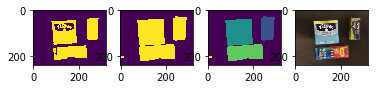

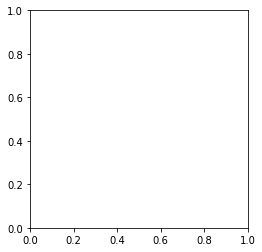

In [49]:
for img in imgs:
    sobel_seg(pwd,img)

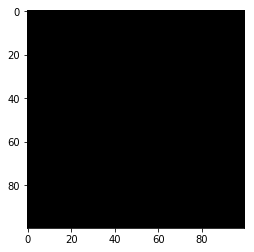

In [10]:
plt.imshow(np.zeros([100,100,3]))